---
title: "Making a waterfall chart"
author: "Damien Martin"
date: "2024-05-01 16:00"
categories: [data-vis, plotnine, gallery]
image: "image.jpg"
description: "Translates an example of a waterfall chart from the ggplot flipbook"
---

This makes a plot of the milk cow cost per head over year, but makes it a waterfall plot. This is taken from the [ggplot flipbook](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#356), who in turn took their data from the [#TidyTuesday project](https://github.com/rfordatascience/tidytuesday/blob/master/data/2019/2019-01-29/milkcow_facts.csv)

In [84]:
import pandas as pd
import plotnine as p9

# Original data available at
# https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-01-29/milkcow_facts.csv
cows = pd.read_csv("milkcow_facts.csv").query('year>=2004')

In [85]:
cows.head()

,year,avg_milk_cow_number,milk_per_cow,milk_production_lbs,avg_price_milk,dairy_ration,milk_feed_price_ratio,milk_cow_cost_per_animal,milk_volume_to_buy_cow_in_lbs,alfalfa_hay_price,slaughter_cow_price
24,2004.0,9010000.0,18960,1.708320e+11,0.161,0.052007,3.10,1580,9813.664596,95.133333,0.5266
25,2005.0,9050000.0,19550,1.769310e+11,0.151,0.046825,3.24,1770,11721.854305,102.525000,0.5394
26,2006.0,9137000.0,19895,1.817820e+11,0.129,0.050371,2.57,1730,13410.852713,107.708333,0.4908
27,2007.0,9189000.0,20204,1.856540e+11,0.191,0.067958,2.80,1830,9581.151832,130.583333,0.4951
28,2008.0,9314000.0,20397,1.899780e+11,0.183,0.091663,2.01,1950,10655.737705,161.333333,0.5144


In [86]:
cows['milk_cow_cost_per_animal_lag'] = cows['milk_cow_cost_per_animal'].shift(1)
cows['percent_change'] = cows['milk_cow_cost_per_animal']/cows['milk_cow_cost_per_animal_lag'] - 1
cows

,year,avg_milk_cow_number,milk_per_cow,milk_production_lbs,avg_price_milk,dairy_ration,milk_feed_price_ratio,milk_cow_cost_per_animal,milk_volume_to_buy_cow_in_lbs,alfalfa_hay_price,slaughter_cow_price,milk_cow_cost_per_animal_lag,percent_change
24,2004.0,9010000.0,18960,1.708320e+11,0.161,0.052007,3.10,1580,9813.664596,95.133333,0.526600,NaN,NaN
25,2005.0,9050000.0,19550,1.769310e+11,0.151,0.046825,3.24,1770,11721.854305,102.525000,0.539400,1580.0,0.120253
26,2006.0,9137000.0,19895,1.817820e+11,0.129,0.050371,2.57,1730,13410.852713,107.708333,0.490800,1770.0,-0.022599
27,2007.0,9189000.0,20204,1.856540e+11,0.191,0.067958,2.80,1830,9581.151832,130.583333,0.495100,1730.0,0.057803
28,2008.0,9314000.0,20397,1.899780e+11,0.183,0.091663,2.01,1950,10655.737705,161.333333,0.514400,1830.0,0.065574
29,2009.0,9202000.0,20561,1.892020e+11,0.128,0.072685,1.78,1390,10859.375000,122.916667,0.443767,1950.0,-0.287179
30,2010.0,9123000.0,21142,1.928770e+11,0.163,0.072030,2.26,1330,8159.509202,116.416667,0.561000,1390.0,-0.043165
31,2011.0,9199000.0,21334,1.962550e+11,0.201,0.107560,1.90,1420,7064.676617,176.083333,0.683000,1330.0,0.067669
32,2012.0,9237000.0,21722,2.006420e+11,0.185,0.121500,1.52,1430,7729.729730,206.083333,0.777100,1420.0,0.007042
33,2013.0,9224000.0,21816,2.012310e+11,0.201,0.117092,1.75,1380,6865.671642,205.830000,0.775600,1430.0,-0.034965


Start with a simple barplot to visualize the data

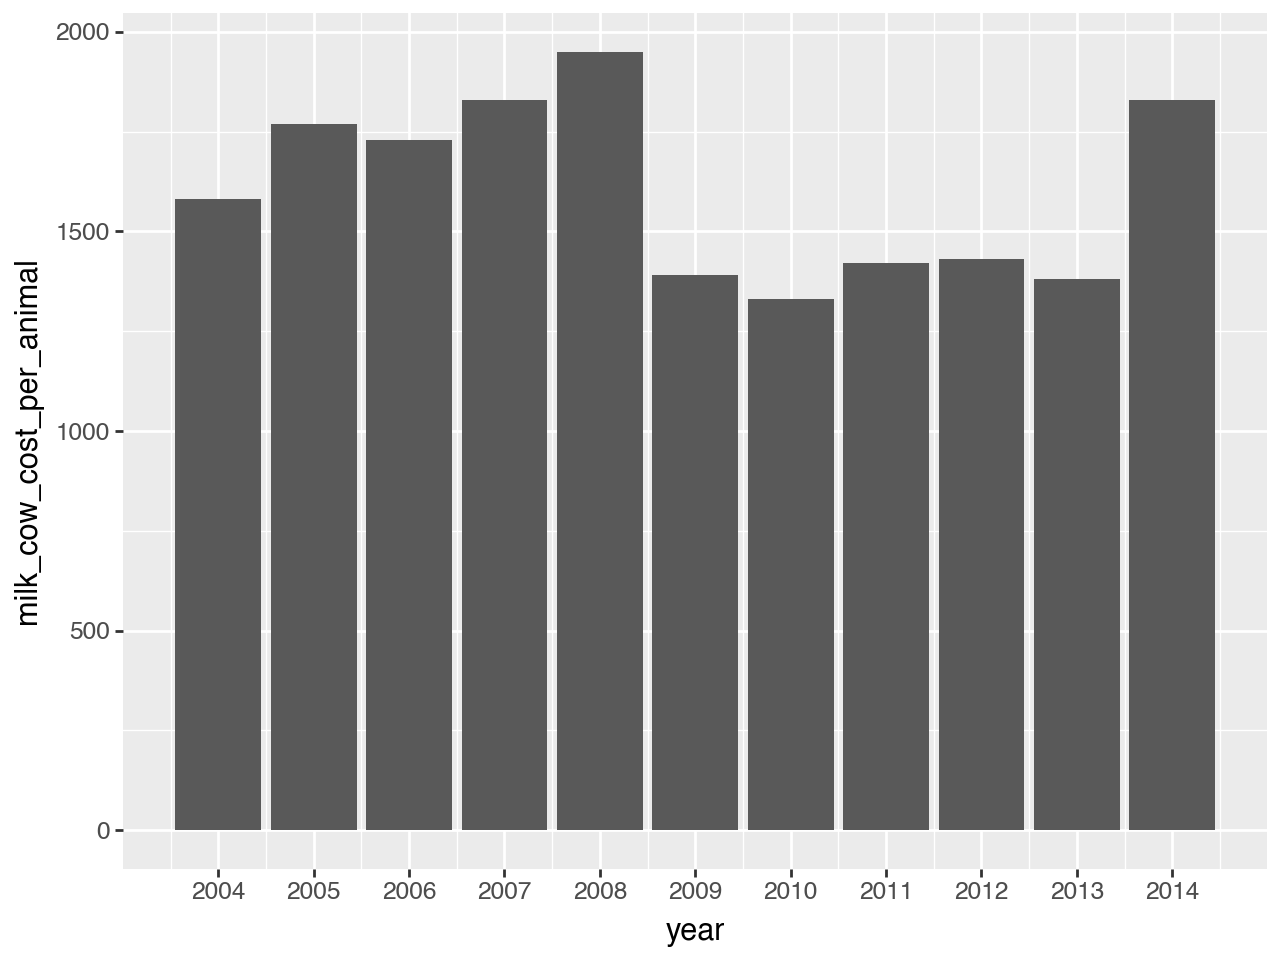

In [87]:
(
    p9.ggplot(cows)
    + p9.aes(x='year', y='milk_cow_cost_per_animal')
    + p9.geom_bar(stat='identity')
    + p9.scale_x_continuous(breaks=cows.year.tolist())
)

Now transform it into a waterfall chart:

/Users/damienmartin/anaconda3/envs/blog/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_rect : Removed 1 rows containing missing values.


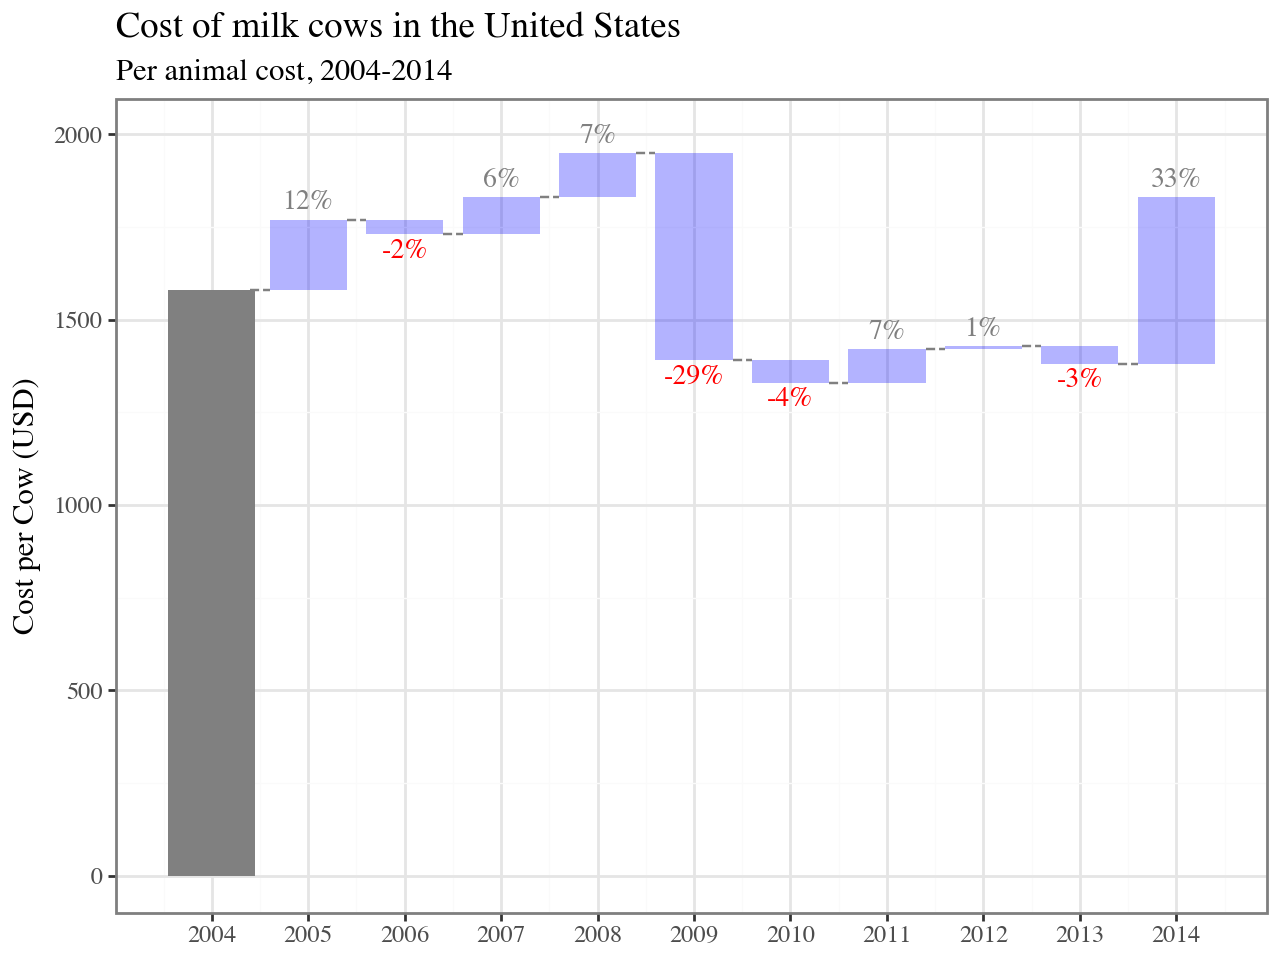

In [89]:
(
    p9.ggplot(cows)
    # Main waterfall
    + p9.aes(
        xmin='year-0.4', xmax='year + 0.4', 
        ymax='milk_cow_cost_per_animal', ymin='milk_cow_cost_per_animal_lag')
    + p9.geom_rect(fill='blue', alpha=0.3)
    + p9.scale_x_continuous(breaks=cows.year.tolist())
    + p9.geom_col(
        data=cows[cows.year==2004], 
        mapping=p9.aes(x='year', y='milk_cow_cost_per_animal'), 
        fill='grey'
    )
    
    # Dashed lines between
    + p9.geom_segment(
        data = cows[cows.year < 2014], 
        mapping=p9.aes(x='year+0.4', xend='year+0.6', y='milk_cow_cost_per_animal', yend='milk_cow_cost_per_animal'), 
        linetype = "dashed", color = "grey")
    + p9.theme_bw(base_family = "Times") 
    
    # The % annotations
    + p9.geom_text(
        data=cows.dropna(),
        mapping = p9.aes(
            y = 'milk_cow_cost_per_animal', 
            x = 'year', 
            color = (cows.dropna().percent_change > 0),
            label=[f'{p:.0%}' for p in cows.dropna().percent_change]),  
        size = 10, 
        nudge_y = [45 if p > 0 else -45 for p in cows.dropna().percent_change],
        show_legend = False)
    + p9.scale_color_manual(values = ("red", "grey"))

    # titles
    + p9.labs(
        x="", 
        y="Cost per Cow (USD)", 
        title = "Cost of milk cows in the United States", 
        subtitle = "Per animal cost, 2004-2014"
    )
)